# BUS 895 Real Estate Term Project

In [1]:
#import packages
import pandas as pd


In [2]:
import os
os.getcwd()


In [3]:
#Load zillow CSVs
data = pd.read_csv("Zillow 1.csv")
data_2 = pd.read_csv("Zillow 2.csv")
data_3 = pd.read_csv("Zillow 3.csv")

In [4]:
#Check for null values in dataframes
print("Are there null values in df 1?:",data.isnull().values.any())
print("Are there null values in df 2?:",data_2.isnull().values.any())
print("Are there null values in df 3?:",data_3.isnull().values.any())

Are there null values in df 1?: False
Are there null values in df 2?: False
Are there null values in df 3?: False


In [5]:
#Check first 5 observations
data.head()

,indicator_id,region_id,date,value
0,ZATT,3101,1998-01-31,338849.0
1,ZATT,3101,1998-02-28,342993.0
2,ZATT,3101,1998-03-31,346763.0
3,ZATT,3101,1998-04-30,349356.0
4,ZATT,3101,1998-05-31,351981.0


In [6]:
data_2.head()

,indicator_id,indicator,category
0,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
1,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
2,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
3,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
4,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values


In [7]:
data_3.head()

,region_id,region_type,region
0,394913,metro,"New York, NY"
1,395056,metro,"San Diego, CA"
2,395121,metro,"St. Louis, MO"
3,395148,metro,"Tampa, FL"
4,394358,metro,"Baltimore, MD"


### Merge dataframes

In [8]:
#Merge df 1 with df 2 on indicator_id
data = data.merge(data_2,left_on='indicator_id',right_on='indicator_id' )

#Merge df1 with df3 on region id
data = data.merge(data_3,left_on='region_id',right_on='region_id')

In [9]:
#Check for null values in dataframes
print("Check for null values in new data frame?:",data.isnull().values.any())

Check for null values in new data frame?: False


### Subset Analysis

In [29]:
subset = data[(data['indicator_id']=='ZATT') & (data['region_type']=='city')]
subset

,indicator_id,region_id,date,value,indicator,category,region_type,region
8843070,ZATT,6181,2020-07-31,1143222.0,ZHVI All Homes- Top Tier Time Series ($),Home values,city,New York; NY; New York-Newark-Jersey City; Que...
8843071,ZATT,6181,2020-06-30,1143665.0,ZHVI All Homes- Top Tier Time Series ($),Home values,city,New York; NY; New York-Newark-Jersey City; Que...
8843072,ZATT,6181,2020-05-31,1143204.0,ZHVI All Homes- Top Tier Time Series ($),Home values,city,New York; NY; New York-Newark-Jersey City; Que...
8843073,ZATT,6181,1996-01-31,360437.0,ZHVI All Homes- Top Tier Time Series ($),Home values,city,New York; NY; New York-Newark-Jersey City; Que...
8843074,ZATT,6181,1996-02-29,359463.0,ZHVI All Homes- Top Tier Time Series ($),Home values,city,New York; NY; New York-Newark-Jersey City; Que...
...,...,...,...,...,...,...,...,...
54729534,ZATT,26559,2020-02-29,90892.0,ZHVI All Homes- Top Tier Time Series ($),Home values,city,Plumville; PA; Indiana; Indiana County
54729535,ZATT,26559,2020-03-31,90926.0,ZHVI All Homes- Top Tier Time Series ($),Home values,city,Plumville; PA; Indiana; Indiana County
54729536,ZATT,26559,2020-04-30,91038.0,ZHVI All Homes- Top Tier Time Series ($),Home values,city,Plumville; PA; Indiana; Indiana County
54729537,ZATT,26559,2020-05-31,91244.0,ZHVI All Homes- Top Tier Time Series ($),Home values,city,Plumville; PA; Indiana; Indiana County


In [30]:
subset['date'] = pd.to_datetime(subset['date'], infer_datetime_format=True)

<ipython-input-30-1f704f2a23fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['date'] = pd.to_datetime(subset['date'], infer_datetime_format=True)


In [31]:
# Set a multi index for time and location 
subset = subset.set_index(['date','region_id'])['value'].unstack(level=1)
subset

region_id,3300,3301,3304,3305,3310,3312,3313,3314,3315,3319,...,399307,737786,737787,737788,737789,737790,737791,760881,760882,760887
date,,,,,,,,,,,,,,,,,,,,,
1996-01-31,NaN,NaN,154844.0,287024.0,89272.0,121566.0,NaN,192788.0,233135.0,222277.0,...,168298.0,608840.0,129959.0,NaN,NaN,262922.0,209340.0,NaN,NaN,176444.0
1996-02-29,NaN,NaN,154382.0,286303.0,89410.0,121521.0,NaN,194597.0,232413.0,222557.0,...,168379.0,606588.0,130237.0,NaN,NaN,261007.0,208882.0,NaN,NaN,176331.0
1996-03-31,NaN,NaN,154262.0,286231.0,89514.0,121799.0,NaN,193959.0,231736.0,222796.0,...,168500.0,606822.0,130725.0,NaN,NaN,260172.0,208325.0,NaN,NaN,176258.0
1996-04-30,NaN,NaN,154183.0,286110.0,89661.0,122231.0,NaN,194322.0,229809.0,223487.0,...,168888.0,604668.0,132324.0,NaN,NaN,257707.0,207451.0,NaN,NaN,176302.0
1996-05-31,NaN,NaN,154292.0,287048.0,89753.0,122814.0,NaN,194975.0,228539.0,224277.0,...,169184.0,600256.0,134042.0,NaN,NaN,255554.0,205975.0,NaN,NaN,176235.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31,301351.0,286482.0,232060.0,490086.0,178479.0,246834.0,51994.0,314212.0,419334.0,347772.0,...,392431.0,1299478.0,285394.0,691310.0,1101893.0,653602.0,317559.0,145353.0,148926.0,285912.0
2020-04-30,303185.0,286560.0,233120.0,490845.0,178348.0,247907.0,52343.0,315417.0,423982.0,347236.0,...,392877.0,1296155.0,288269.0,688362.0,1103826.0,655889.0,317597.0,145638.0,150694.0,287653.0
2020-05-31,311199.0,284901.0,237105.0,489570.0,183716.0,247368.0,52932.0,316364.0,418060.0,348620.0,...,393458.0,1300191.0,290184.0,694579.0,1103448.0,658782.0,315809.0,148165.0,159469.0,290993.0


In [32]:
# We have to take the percent changes to get to returns 
# This ranking is our signal
# Shift the ranking 1 time frame
# The shift makes for a more steady signal, as there are often changes in the 1  month leg that we dont want capture
subset_pct = subset.pct_change(6).shift(1)
subset_pct.rank(axis=1)

subset_pct= pd.DataFrame(subset_pct.stack())
subset_pct

0
date       region_id          
1996-08-31 3304      -0.009519
           3305      -0.000146
           3310       0.009208
           3312       0.017028
           3314       0.031937
...                        ...
2020-07-31 737790     0.013223
           737791    -0.001969
           760881     0.014992
           760882     0.089768
           760887     0.042709

[5823226 rows x 1 columns]

In [33]:
#Name the return column
subset_pct.columns = ['Return']

In [34]:
subset_pct = subset_pct.dropna().drop_duplicates()

In [35]:
#Create 10 "portfolios" with equal proportions of zip codes ranked on return
subset_pct["Quantile"] =  subset_pct.groupby(level='date')["Return"].apply(pd.qcut, q=10, labels=False)
subset_pct.tail()

Return  Quantile
date       region_id                    
2020-07-31 737790     0.013223         4
           737791    -0.001969         2
           760881     0.014992         5
           760882     0.089768         9
           760887     0.042709         8

In [36]:
# Create a new variable within this stacked that dataframe is the lagged Quantiles
# Groupby region_id, shift() quantile 
subset_pct["Lagged Q"] = subset_pct.groupby(level ='region_id')['Quantile'].shift(1)

In [37]:
### What is the process now?
# Then Groupby lagged quantile, calculate next months return 
# Append in next month's return 
# subset_pct['Monthly Return'] = 
# monthly return for each area (pct_change(1))

In [38]:
# Then groupby `date` again AND `lagged quantile`, and calculate average `Monthly Return` 
# Monthly return is equal to the % change
# Should i include  "region ID"  as well? Otherwise it will get lost when i do the group by function 
# No, becuase once we group by region Id in the previous steps we consolidate the region IDs into quantiles.
# This essentially changes the variable we are looking at, from individual region IDs to groups of IDs


subset_pct = subset_pct.groupby(['date','Lagged Q'],as_index = True)['Return'].mean()
subset_pct.head(20)

date        Lagged Q
1996-09-30  0.0        -0.043804
            1.0        -0.019801
            2.0        -0.010635
            3.0        -0.003553
            4.0         0.002314
            5.0         0.007815
            6.0         0.013362
            7.0         0.020133
            8.0         0.029435
            9.0         0.054223
1996-10-31  0.0        -0.044251
            1.0        -0.018789
            2.0        -0.009417
            3.0        -0.002599
            4.0         0.003578
            5.0         0.008915
            6.0         0.014751
            7.0         0.021788
            8.0         0.031161
            9.0         0.056357
Name: Return, dtype: float64

In [39]:
# Now for each group, cumulate those monthly returns 
# (1+ret).cumprod() # this is an operation across columns
# Then we can unstack by location 
# Then we'll have like a time series for each area but just for one indicator 
# So let's try that for price index so that we can start just one indicator, momentum 
#one region ID over time

In [40]:
subset_pct = subset_pct.unstack(level= 1)

In [41]:
### How does this metric (12 month rolling window) differ from the cumulative product???
### I see in your notes that you use a cumprod()+1 but wanted to check
import numpy as np
(1+subset_pct).rolling(window=12).apply(np.prod, raw=True) - 1

Lagged Q,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
date,,,,,,,,,,
1996-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-03-31,-0.191479,0.016676,0.104580,0.169232,0.222578,0.273048,0.325845,0.390420,0.490245,0.820100
2020-04-30,-0.190829,0.014042,0.099973,0.163284,0.216090,0.266049,0.318914,0.383751,0.483934,0.811170
2020-05-31,-0.192455,0.010241,0.094133,0.156292,0.208222,0.257985,0.311088,0.376352,0.478569,0.804544


In [42]:
#cumprod subset 
subset_cumret = (1+subset_pct).cumprod()
subset_cumret

Lagged Q,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
date,,,,,,,,,,
1996-09-30,0.956196,0.980199,0.989365,0.996447,1.002314,1.007815,1.013362,1.020133,1.029435,1.054223e+00
1996-10-31,0.913883,0.961782,0.980048,0.993857,1.005900,1.016799,1.028310,1.042359,1.061513,1.113635e+00
1996-11-30,0.878093,0.947298,0.973555,0.993150,1.010738,1.026859,1.043764,1.064831,1.093111,1.172297e+00
1996-12-31,0.846669,0.935336,0.969093,0.994189,1.016592,1.038036,1.060503,1.087557,1.125419,1.231634e+00
1997-01-31,0.818681,0.925449,0.966040,0.996633,1.023929,1.049962,1.078117,1.111855,1.159003,1.292420e+00
...,...,...,...,...,...,...,...,...,...,...
2020-03-31,0.000033,0.059919,0.818810,4.957889,23.357827,108.250355,572.063898,4061.366567,64336.423893,4.905339e+07
2020-04-30,0.000032,0.059844,0.822661,5.002756,23.649079,109.978327,583.470705,4161.155940,66360.405221,5.145734e+07
2020-05-31,0.000031,0.059654,0.825224,5.039962,23.916784,111.631971,594.876415,4263.392375,68483.931624,5.402449e+07


In [49]:
subset_cumret.head(1) #Why does first row still have values?

Lagged Q,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
date,,,,,,,,,,
1996-09-30,0.956196,0.980199,0.989365,0.996447,1.002314,1.007815,1.013362,1.020133,1.029435,1.054223


In [51]:
tail = subset_pct_cp.tail(1)
tail # Is this the final signal for this subset?

In [45]:
# Check with Chris - are we only interested in the last row or last 12 periods?
# Since we want to capture current ranking of the portfiolos, how far do we look bacK? 
# I think we are making investments in the portfolio's most recent perforamce
# So the last row or last 12 is the most important 

#Also need to decide how to make train test split

In [46]:
#Do I need to think about the profitable count (len profitable months), or unprofitable count(len unprofitable counts) 

In [47]:
#Pull in standard deviation of returns?
#Greater the standard deviation, the greater the risk (and potentual for greater payout too)

In [48]:
#Sharpe Ratio
#Identify how much excess reward is associated with an investment after risk is accounted for

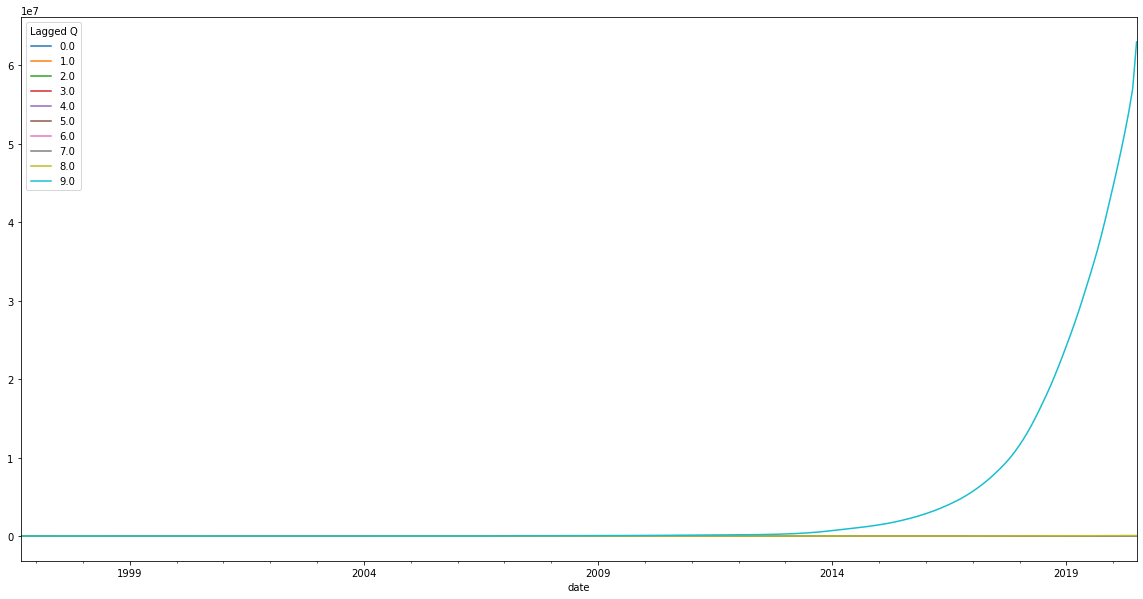

In [55]:
subset_cumret.plot(figsize=(20,10))

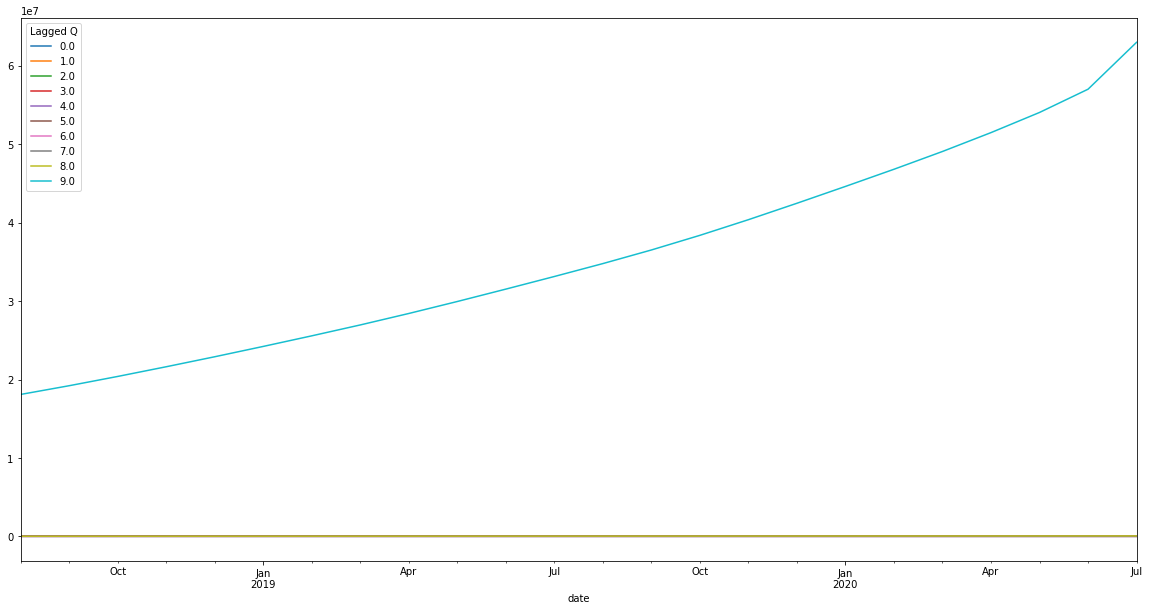

In [58]:
last_2_years = subset_cumret.tail(24)
last_2_years.plot(figsize=(20,10))

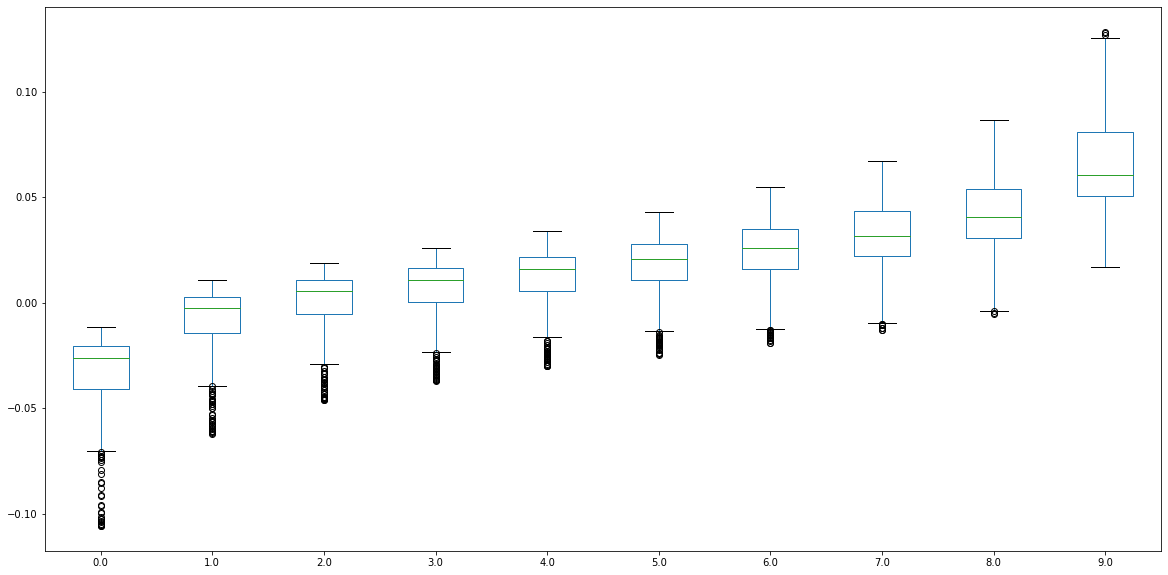

In [61]:
subset_pct.plot.box(figsize=(20,10))

In [70]:
#monthly standard deviation
subset_pct.std().sort_values(ascending=False)

Lagged Q
9.0    0.025263
0.0    0.022777
8.0    0.021548
7.0    0.019110
1.0    0.018924
6.0    0.017567
2.0    0.017309
5.0    0.016562
3.0    0.016463
4.0    0.016231
dtype: float64

In [72]:
# Construct a Correlation table of returns for these assets during this time. 
# Which provided the hedge against the S&P 500's drop?
corr_df = subset_pct.corr()
corr_df.style.background_gradient(cmap="summer") #love the summer clors :)

Lagged Q,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Lagged Q,,,,,,,,,,
0.0,1.000000,0.975586,0.953553,0.934662,0.913896,0.888720,0.856658,0.817969,0.769813,0.679014
1.0,0.975586,1.000000,0.995662,0.988030,0.977090,0.960972,0.936831,0.905295,0.862427,0.780131
2.0,0.953553,0.995662,1.000000,0.997757,0.991188,0.978590,0.957351,0.928650,0.888087,0.808221
3.0,0.934662,0.988030,0.997757,1.000000,0.997501,0.988709,0.971032,0.945647,0.908035,0.831522
4.0,0.913896,0.977090,0.991188,0.997501,1.000000,0.996457,0.984306,0.964061,0.931403,0.860698
5.0,0.888720,0.960972,0.978590,0.988709,0.996457,1.000000,0.995374,0.982216,0.956665,0.894578
6.0,0.856658,0.936831,0.957351,0.971032,0.984306,0.995374,1.000000,0.995426,0.978962,0.927788
7.0,0.817969,0.905295,0.928650,0.945647,0.964061,0.982216,0.995426,1.000000,0.993491,0.954617
8.0,0.769813,0.862427,0.888087,0.908035,0.931403,0.956665,0.978962,0.993491,1.000000,0.978275


In [74]:
# Calculate the annualized standard deviation?? Is this needed for my project?
# I think so, there would be 12 trading months per year... need to confirm with Chris
(subset_pct.std() * np.sqrt(12)).sort_values(ascending=False)

Lagged Q
9.0    0.087513
0.0    0.078901
8.0    0.074643
7.0    0.066199
1.0    0.065556
6.0    0.060853
2.0    0.059959
5.0    0.057371
3.0    0.057028
4.0    0.056224
dtype: float64

In [75]:
# Calculate Annualzied Sharpe Ratios:
# On the basis of Sharpe Ratios... which asset provided the best return-to-risk ratio?
sharpe_ratios = (subset_pct.mean() * 12) / (subset_pct.std() * np.sqrt(12))
sharpe_ratios.sort_values(ascending=False)

Lagged Q
9.0    8.894929
8.0    6.439941
7.0    5.426490
6.0    4.500601
5.0    3.519154
4.0    2.421184
3.0    1.230139
2.0   -0.098665
1.0   -1.762580
0.0   -5.392869
dtype: float64

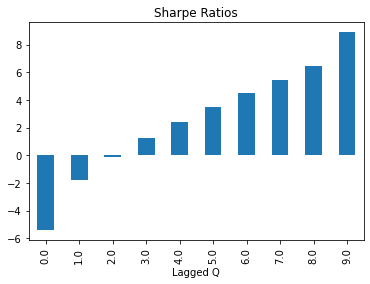

In [76]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.sort_values().plot(kind="bar", title="Sharpe Ratios")